In [ ]:
!pip install Arabic-Stopwords

In [ ]:
!pip install emoji

In [ ]:
!pip install PyArabic

In [ ]:
!pip install openpyxl

In [ ]:
!pip install Tashaphyne


In [ ]:
!pip install nltk.download('stopwords')


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install nltk.download('stopwords')'


In [ ]:
import pandas as pd

df=pd.read_csv('/content/Final_Data.csv')

df.head()

review_description    rating company
0                                               ÿ±ÿßÿ¶ÿπ  positive  talbat
1  ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß Ÿäÿ≥ÿßÿπÿØ ÿπŸÑŸâ ÿ™ŸÑÿ®ŸäŸá ÿßŸÑÿßÿ≠ÿ™Ÿäÿßÿ¨ÿßÿ™ ÿ®ÿ¥ŸÉ...  positive  talbat
2  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß Ÿäÿ∫ÿ™ÿ≠ ÿØÿßÿ¶ŸÖÿß ÿ®Ÿäÿπÿ∑ŸäŸÜŸä ŸÑÿß ŸäŸàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ÿ®ÿß...  negative  talbat
3                 ŸÑŸÖÿßÿ∞ÿß ŸÑÿß ŸäŸÖŸÉŸÜŸÜÿß ÿ∑ŸÑÿ® ŸÖŸÜ ŸÖÿßŸÉÿØŸàŸÜÿßŸÑÿØÿ≤ÿü  negative  talbat
4  ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ®Ÿäÿ∏Ÿáÿ± ŸÉŸÑ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ Ÿà ŸÖÿ∫ŸÑŸÇŸá ŸÖÿπ ÿßŸÜŸáÿß ÿ®ÿ™ŸÉŸà...  negative  talbat

In [ ]:
df.rename(columns ={'rating':'label'},inplace =True)

In [ ]:
df.shape

(40046, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40046 entries, 0 to 40045
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_description  40045 non-null  object
 1   label               40046 non-null  object
 2   company             40046 non-null  object
dtypes: object(3)
memory usage: 938.7+ KB


In [ ]:
df.label.value_counts()

label
positive    23921
negative    14200
neutral      1925
Name: count, dtype: int64

In [ ]:
# Add environment Packages paths to conda
import os, sys, warnings
import pandas as pd
import numpy as np
warnings.simplefilter("ignore")

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
import regex
import emoji
# Corpora is a group presenting multiple collections of text documents. A single collection is called corpus.
from nltk.corpus import stopwords # Stopwords
import arabicstopwords.arabicstopwords as stp #more range of arabic stop words
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer

from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
#from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline


<Axes: xlabel='label', ylabel='count'>

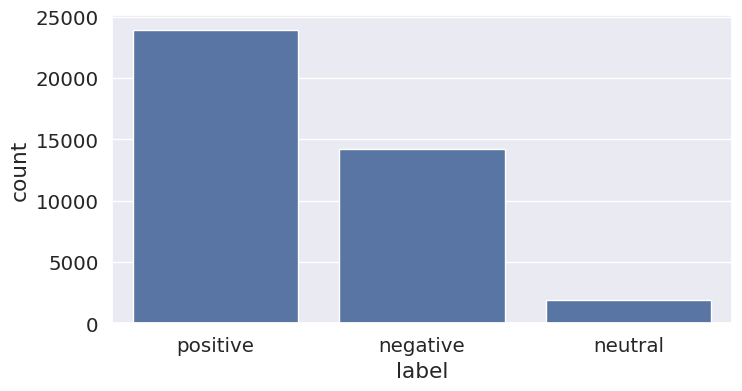

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='label',data=df)

In [ ]:
df.isnull().sum()

review_description    1
label                 0
company               0
dtype: int64

In [ ]:
df[df['review_description'].isnull() == True]

review_description     label company
5911                NaN  negative  talbat

In [ ]:
df.duplicated().sum()

28

In [ ]:
df[df['review_description'].duplicated() == True]

review_description     label company
7243               ÿ≠ŸÑŸà ÿ¨ÿØÿß  positive  talbat
7252              ÿ¨ÿßŸÖÿØ ÿ¨ÿØÿß  positive  talbat
32074                ŸÖŸÖÿ™ÿßÿ≤  positive    swvl
32087                   ok  positive    swvl
32088            ÿßÿ≥Ÿàÿ° ÿ¥ÿ±ŸÉŸá  negative    swvl
...                    ...       ...     ...
39975                  ÿ≥Ÿäÿ¶  negative    swvl
39978                ŸÖÿπŸÇŸàŸÑ   neutral    swvl
39979                 ŸÉŸàŸäÿ≥  positive    swvl
39980                 ŸÖŸÜÿ∏ŸÖ  positive    swvl
39997  ÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥ŸáŸÑ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ  positive    swvl

[1042 rows x 3 columns]

In [ ]:
df=df.dropna()

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

review_description    0
label                 0
company               0
dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
arabic_stopwords = stopwords.words("arabic")
arabic_stopwords

['ÿ•ÿ∞',
 'ÿ•ÿ∞ÿß',
 'ÿ•ÿ∞ŸÖÿß',
 'ÿ•ÿ∞ŸÜ',
 'ÿ£ŸÅ',
 'ÿ£ŸÇŸÑ',
 'ÿ£ŸÉÿ´ÿ±',
 'ÿ£ŸÑÿß',
 'ÿ•ŸÑÿß',
 'ÿßŸÑÿ™Ÿä',
 'ÿßŸÑÿ∞Ÿä',
 'ÿßŸÑÿ∞ŸäŸÜ',
 'ÿßŸÑŸÑÿßÿ™Ÿä',
 'ÿßŸÑŸÑÿßÿ¶Ÿä',
 'ÿßŸÑŸÑÿ™ÿßŸÜ',
 'ÿßŸÑŸÑÿ™Ÿäÿß',
 'ÿßŸÑŸÑÿ™ŸäŸÜ',
 'ÿßŸÑŸÑÿ∞ÿßŸÜ',
 'ÿßŸÑŸÑÿ∞ŸäŸÜ',
 'ÿßŸÑŸÑŸàÿßÿ™Ÿä',
 'ÿ•ŸÑŸâ',
 'ÿ•ŸÑŸäŸÉ',
 'ÿ•ŸÑŸäŸÉŸÖ',
 'ÿ•ŸÑŸäŸÉŸÖÿß',
 'ÿ•ŸÑŸäŸÉŸÜ',
 'ÿ£ŸÖ',
 'ÿ£ŸÖÿß',
 'ÿ£ŸÖÿß',
 'ÿ•ŸÖÿß',
 'ÿ£ŸÜ',
 'ÿ•ŸÜ',
 'ÿ•ŸÜÿß',
 'ÿ£ŸÜÿß',
 'ÿ£ŸÜÿ™',
 'ÿ£ŸÜÿ™ŸÖ',
 'ÿ£ŸÜÿ™ŸÖÿß',
 'ÿ£ŸÜÿ™ŸÜ',
 'ÿ•ŸÜŸÖÿß',
 'ÿ•ŸÜŸá',
 'ÿ£ŸÜŸâ',
 'ÿ£ŸÜŸâ',
 'ÿ¢Ÿá',
 'ÿ¢Ÿáÿß',
 'ÿ£Ÿà',
 'ÿ£ŸàŸÑÿßÿ°',
 'ÿ£ŸàŸÑÿ¶ŸÉ',
 'ÿ£ŸàŸá',
 'ÿ¢Ÿä',
 'ÿ£Ÿä',
 'ÿ£ŸäŸáÿß',
 'ÿ•Ÿä',
 'ÿ£ŸäŸÜ',
 'ÿ£ŸäŸÜ',
 'ÿ£ŸäŸÜŸÖÿß',
 'ÿ•ŸäŸá',
 'ÿ®ÿÆ',
 'ÿ®ÿ≥',
 'ÿ®ÿπÿØ',
 'ÿ®ÿπÿ∂',
 'ÿ®ŸÉ',
 'ÿ®ŸÉŸÖ',
 'ÿ®ŸÉŸÖ',
 'ÿ®ŸÉŸÖÿß',
 'ÿ®ŸÉŸÜ',
 'ÿ®ŸÑ',
 'ÿ®ŸÑŸâ',
 'ÿ®ŸÖÿß',
 'ÿ®ŸÖÿßÿ∞ÿß',
 'ÿ®ŸÖŸÜ',
 'ÿ®ŸÜÿß',
 'ÿ®Ÿá',
 'ÿ®Ÿáÿß',
 'ÿ®ŸáŸÖ',
 'ÿ®ŸáŸÖÿß',
 'ÿ®ŸáŸÜ',
 'ÿ®Ÿä',
 'ÿ®ŸäŸÜ',
 'ÿ®ŸäÿØ',
 'ÿ™ŸÑŸÉ',
 'ÿ™ŸÑŸÉŸÖ',
 'ÿ™ŸÑŸÉŸÖÿß',
 'ÿ™Ÿá',
 'ÿ™Ÿä',
 'ÿ™ŸäŸ

In [ ]:
len(arabic_stopwords)

754

In [ ]:
egyptian_stopwords_base = [
    'ŸäÿπŸÜŸä', 'ŸÉÿØŸá', 'ÿ£ŸàŸä', 'ÿ®ÿ™ÿßÿπ', 'ÿ®ÿ™ÿßÿπÿ©', 'ÿ•ÿ≤ÿßŸä', 'ÿ•ŸäŸá', 'ÿ®ÿ≥', 'ÿ≤Ÿä', 'ÿØŸä',
    'ÿØŸá', 'ÿØÿß', 'ŸÅŸäŸÜ', 'ŸÑŸäŸá', 'ÿ•ŸÖÿ™Ÿâ', 'ŸÖŸäŸÜ',
    'ŸÉÿßŸÖ', 'ŸáŸÜÿß', 'ŸáŸÜÿßŸÉ', 'ÿ¨Ÿàÿ©', 'ÿ®ÿ±ÿß', 'ŸÅŸàŸÇ', 'ÿ™ÿ≠ÿ™', 'ÿ¨ŸàŸá', 'ŸÇÿØÿßŸÖ', 'Ÿàÿ±ÿß',
    'ÿ¨ŸÜÿ®', 'ÿπŸÑÿ¥ÿßŸÜ', 'ÿ£ŸáŸà', 'ÿ®ŸÇŸâ', 'ŸÑÿ≥Ÿá', 'ŸÉÿØÿ©', 'ŸäÿπŸÜŸäŸá', 'ÿ•ÿ≠ŸÜÿß', 'ÿ•ŸÜÿ™', 'ÿ•ŸÜÿ™Ÿàÿß',
    'ŸáŸà', 'ŸáŸä', 'ÿØŸàŸÑ', 'ŸÉŸÖÿßŸÜ', 'ÿ®ÿ±ÿ∂Ÿà', 'ÿ£ŸÉŸäÿØ', 'ÿ∑ÿ®', 'ÿ®ÿπÿØŸäŸÜ', 'ÿ£ŸäŸàŸá', 'ŸÑÿß'
    , 'ŸÉŸÑŸá', 'ŸÉŸÑŸáÿß', 'ÿ£Ÿä', 'ÿ®ÿ™Ÿàÿπ', 'ÿ≠ÿßŸÑŸäŸãÿß', 'ÿ™Ÿà', 'ÿØŸÑŸàŸÇÿ™Ÿä', 'ÿ®ŸÉÿ±ÿ©', 'ÿ•ŸÖÿ®ÿßÿ±ÿ≠',
    'ŸÉŸÑ', 'ŸÉŸÑŸÜÿß', 'ŸÉŸÑŸáŸÖ', 'ÿ®ÿ≥ÿ±ÿπÿ©', 'ÿ¥ŸàŸäÿ©', 'ÿ¥ŸàŸäÿ™ŸäŸÜ', 'ÿÆÿßŸÑÿµ', 'Ÿà', 'Ÿäÿß', 'ŸÑŸà',
    'ŸÑŸÖÿß', 'ŸÑŸÖŸÜ', 'ŸÑÿ∫ÿßŸäÿ©', 'ŸÖŸÜŸäŸÜ', 'ŸÑÿ≠ÿ™Ÿâ', 'ÿπŸÑŸä', 'ÿπŸÜ', 'ŸÇÿ®ŸÑ', 'ÿ®ÿπÿØ', 'ÿ™ÿ≠ÿ™Ÿä',
    'ŸÅŸàŸÇŸä', 'ÿ¨ŸÜÿ®Ÿä', 'Ÿàÿ±ÿßŸäÿß', 'ŸÇÿØÿßŸÖŸä', 'ÿ¨ŸàÿßŸäÿß', 'ÿ®ÿ±Ÿá', 'ÿ£Ÿá', 'ÿßŸáÿß', 'ÿ•Ÿä', 'ÿ•Ÿàÿß',
    'ÿ®ŸÇÿß', 'ÿ®ÿ™ŸÇŸàŸÑ', 'ÿ®ÿ™ŸÇŸàŸÑŸàÿß', 'ŸäÿπŸÜŸàÿß', 'ŸÉÿØŸä', 'ÿ•ÿ≤ŸäŸÉ', 'ÿ•ÿ≤Ÿä', 'ÿ•ÿ≤ŸäŸÉŸà', 'ÿ•ÿ≤ŸäŸá',
    'ÿ•ÿ≤ŸäŸáŸÖ', 'ÿ•ÿ≤ŸäŸÜÿß', 'ÿ•ÿ≤ŸäŸÉŸÖ', 'ÿ∑ÿ®ÿπŸãÿß', 'ÿ£ÿµŸÑŸãÿß', 'ŸÅŸäŸÜŸÉ', 'ŸÅŸäŸÜŸÉŸÖ', 'ŸÅŸäŸÜŸáŸÖ', 'ŸÅŸäŸÜŸá',
    'ŸÅŸäŸÜŸáÿß', 'ŸÅŸäŸÜŸà', 'ÿ•ŸäŸáÿØŸá', 'ÿ•ŸäÿØÿß', 'ÿ•ŸäÿØŸä', 'ÿ•ŸäÿØŸÉ', 'ÿ•ŸäÿØŸá', 'ÿ•ŸäÿØŸáÿß', 'ÿ•ŸäÿØŸáŸà',
    'ÿ•ŸäÿØŸáŸàŸÖ', 'ŸÉÿØÿßŸÉ', 'ŸÉÿØÿßŸá', 'ŸÉÿØÿßŸáÿß', 'ŸÉÿØÿßŸáŸà', 'ŸÉÿØÿßŸáŸÖ', 'ÿßŸÜÿß', 'ŸàÿßŸÑŸÑŸá', 'ÿ¥Ÿä',
    'ŸÉÿßŸÜ', 'ÿ®ÿπÿ∂', 'ÿ™ŸÖ', 'ŸÅŸâ'
]

egyptian_stopwords_extra = [
    'ÿ®ÿ™ÿßÿπŸáŸÖ', 'ÿ®ÿ™ÿßÿπŸÜÿß', 'ÿ®ÿ™ÿßÿπŸÉŸÖ', 'ÿ®ÿ™ÿßÿπŸä', 'ÿ®ÿ™ÿßÿπŸá', 'ÿ®ÿ™ÿßÿπŸáÿß', 'ÿ®ÿ™ÿßÿπŸà', 'ÿ≤ŸäŸÉ',
    'ÿ≤ŸäŸá', 'ÿ≤ŸäŸáÿß', 'ÿ≤ŸäŸáŸÖ', 'ÿ≤ŸäŸÜÿß', 'ÿ≤ŸäŸÉŸÖ', 'ÿ≤ŸäŸà', 'ŸÉÿØŸäŸá', 'ŸÉÿØŸàŸá', 'ŸÉÿØÿßŸáÿß', 'ŸÉÿØÿßŸáŸÖ',
    'ŸÉÿØÿßŸáŸà', 'ÿ•ÿ≤ŸäŸÉŸä', 'ÿ•ÿ≤ŸäŸÉŸàÿß', 'ÿ•ÿ≤ŸäŸáŸÖ', 'ÿ•ÿ≤ŸäŸÜÿß', 'ÿ•ÿ≤ŸäŸÉŸàŸÖ', 'ŸÅŸäŸÜŸä', 'ŸÅŸäŸÉ', 'ŸÅŸäŸáŸà',
    'ŸÅŸäŸáÿß', 'ŸÅŸäŸáŸÖ', 'ŸÅŸäŸÉŸÖ', 'ŸÅŸäŸÜÿß', 'ÿ•ŸäÿØŸáŸä', 'ÿ•ŸäÿØŸáŸàŸÖ', 'ÿ•ŸäÿØŸäŸÜÿß', 'ÿ•ŸäÿØŸäŸÉ', 'ÿ•ŸäÿØŸäŸÉŸÖ',
    'ÿ•ŸäÿØŸäŸáŸÖ', 'ÿ•ŸäÿØŸäŸá', 'ÿ®ÿ™ŸÇŸàŸÑŸä', 'ÿ®ÿ™ŸÇŸàŸÑŸà', 'ÿ®ÿ™ŸÇŸàŸÑŸáŸÖ', 'ÿ®ÿ™ŸÇŸàŸÑŸÜÿß', 'ÿ®ÿ™ŸÇŸàŸÑŸÉ', 'ÿ®ÿ™ŸÇŸàŸÑŸÉŸÖ',
    'ŸäÿπŸÜŸäŸÉŸä', 'ŸäÿπŸÜŸäŸáŸÖ', 'ŸäÿπŸÜŸäŸÜŸä', 'ŸäÿπŸÜŸäŸÉŸàŸÖ', 'ŸäÿπŸÜŸäŸáÿß', 'ŸäÿπŸÜŸäŸáŸà', 'ÿ£ŸáŸàŸá', 'ÿ£ŸáŸä',
    'ÿ£ŸáŸäÿß', 'ÿ£ŸáŸäŸá', 'ÿ£ŸáŸäŸáŸÖ', 'ÿ£ŸáŸäŸáÿß', 'ÿ£ŸáŸäŸà', 'ÿ®ŸÇŸäŸÜÿß', 'ÿ®ŸÇŸäÿ™Ÿàÿß', 'ÿ®ŸÇŸàÿß', 'ÿ®ŸÇŸäÿ™',
    'ÿ®ŸÇŸäÿ™Ÿä', 'ÿ®ŸÇŸä', 'ŸÑÿ≥ŸÜÿß', 'ŸÑÿ≥ŸÜŸä', 'ŸÑÿ≥ŸÉ',
    'ŸÑÿ≥ŸÉŸÖ', 'ŸÑÿ≥Ÿáÿß', 'ŸÑÿ≥Ÿàÿß',  'ÿ£ŸàŸÉŸäŸÉŸÖ', 'ŸÅŸäŸÜŸÉŸä', 'ŸÅŸäŸÜŸÉŸà', 'ŸÅŸäŸÜŸáŸÖ', 'ŸÅŸäŸÜŸáŸà',
    'ŸÅŸäŸÜŸáÿß', 'ŸÅŸäŸÜŸä', 'ŸÅŸäŸÉŸä', 'ŸÅŸäŸÉŸà', 'ÿ•ÿ≠ŸÜÿßŸÉ', 'ÿ•ÿ≠ŸÜÿßŸá', 'ÿ•ÿ≠ŸÜÿßŸáÿß', 'ÿ•ÿ≠ŸÜÿßŸáŸÖ', 'ÿ•ÿ≠ŸÜÿßŸÜÿß',
    'ÿ•ÿ≠ŸÜÿßŸÉŸÖ', 'ÿ•ŸÜÿ™Ÿä', 'ÿ•ŸÜÿ™Ÿà', 'ÿ•ŸÜÿ™ŸÉ', 'ÿ•ŸÜÿ™Ÿáÿß', 'ÿ•ŸÜÿ™ŸáŸÖ', 'ÿ•ŸÜÿ™ŸÜÿß', 'ÿ•ŸÜÿ™ŸÉŸÖ', 'ŸáŸàŸä',
    'ŸáŸàŸá', 'ŸáŸàŸáÿß', 'ŸáŸàŸáŸÖ', 'ŸáŸàŸÜÿß', 'ŸáŸàŸÉŸÖ', 'ŸáŸäŸä', 'ŸáŸäŸá', 'ŸáŸäŸáÿß', 'ŸáŸäŸáŸÖ', 'ŸáŸäŸÜÿß',
    'ŸáŸäŸÉŸÖ', 'ÿØŸàŸÑŸä', 'ÿØŸàŸÑŸá', 'ÿØŸàŸÑŸáÿß', 'ÿØŸàŸÑŸáŸÖ', 'ÿØŸàŸÑŸÜÿß', 'ÿØŸàŸÑŸÉŸÖ', 'ÿØŸäŸä', 'ÿØŸäŸá',
    'ÿØŸäŸáÿß', 'ÿØŸäŸáŸÖ', 'ÿØŸäŸÜÿß', 'ÿØŸäŸÉŸÖ', 'ŸÉŸÖÿßŸÜŸä', 'ŸÉŸÖÿßŸÜŸá', 'ŸÉŸÖÿßŸÜŸáÿß', 'ŸÉŸÖÿßŸÜŸáŸÖ', 'ŸÉŸÖÿßŸÜŸÜÿß',
    'ŸÉŸÖÿßŸÜŸÉŸÖ', 'ÿ®ÿ±ÿ∂ŸàŸä', 'ÿ®ÿ±ÿ∂ŸàŸá', 'ÿ®ÿ±ÿ∂ŸàŸáÿß', 'ÿ®ÿ±ÿ∂ŸàŸáŸÖ', 'ÿ®ÿ±ÿ∂ŸàŸÜÿß', 'ÿ®ÿ±ÿ∂ŸàŸÉŸÖ', 'ÿ£ŸÉŸäÿØŸä',
    'ÿ£ŸÉŸäÿØŸá', 'ÿ£ŸÉŸäÿØŸáÿß', 'ÿ£ŸÉŸäÿØŸáŸÖ', 'ÿ£ŸÉŸäÿØŸÜÿß', 'ÿ£ŸÉŸäÿØŸÉŸÖ', 'ÿ∑ÿ®Ÿä', 'ÿ∑ÿ®Ÿá', 'ÿ∑ÿ®Ÿáÿß', 'ÿ∑ÿ®ŸáŸÖ',
    'ÿ∑ÿ®ŸÜÿß', 'ÿ∑ÿ®ŸÉŸÖ', 'ÿ®ÿπÿØŸäŸÜŸä', 'ÿ®ÿπÿØŸäŸÜŸá', 'ÿ®ÿπÿØŸäŸÜŸáÿß', 'ÿ®ÿπÿØŸäŸÜŸáŸÖ', 'ÿ®ÿπÿØŸäŸÜŸÜÿß', 'ÿ®ÿπÿØŸäŸÜŸÉŸÖ',
    'ÿ£ŸäŸàŸáŸä', 'ÿ£ŸäŸàŸáŸá', 'ÿ£ŸäŸàŸáŸáÿß', 'ÿ£ŸäŸàŸáŸáŸÖ', 'ÿ£ŸäŸàŸáŸÜÿß', 'ÿ£ŸäŸàŸáŸÉŸÖ', 'ŸÑÿßŸá', 'ŸÑÿßŸáÿß', 'ŸÑÿßŸáŸÖ',
    'ŸÑÿßŸÜÿß', 'ŸÑÿßŸÉŸÖ', 'ÿπÿßÿØŸäŸáÿß', 'ÿπÿßÿØŸäŸáŸÖ', 'ÿπÿßÿØŸäŸÜÿß', 'ÿπÿßÿØŸäŸÉŸÖ', 'ŸÉŸÑŸáŸä',
    'ŸÉŸÑŸáŸá', 'ŸÉŸÑŸáŸáÿß', 'ŸÉŸÑŸáŸáŸÖ', 'ŸÉŸÑŸÜŸä', 'ŸÉŸÑŸÜŸá', 'ŸÉŸÑŸÜŸáÿß', 'ŸÉŸÑŸÜŸáŸÖ', 'ŸÉŸÑŸÜŸÜÿß', 'ŸÉŸÑŸÜŸÉŸÖ',
    'ÿ®ÿ≥ÿ±ÿπÿ™Ÿá', 'ÿ®ÿ≥ÿ±ÿπÿ™Ÿáÿß', 'ÿ®ÿ≥ÿ±ÿπÿ™ŸáŸÖ', 'ÿ®ÿ≥ÿ±ÿπÿ™ŸÜÿß', 'ÿ®ÿ≥ÿ±ÿπÿ™ŸÉŸÖ', 'ÿ¥ŸàŸäŸá', 'ÿ¥ŸàŸäÿßÿ™', 'ÿ¥ŸàŸäŸÜÿß',
    'ÿ¥ŸàŸäŸÉ', 'ÿ¥ŸàŸäŸÉŸÖ', 'ÿ¥ŸàŸäŸáŸÖ', 'ÿ¥ŸàŸäŸáÿß', 'ÿ¥ŸàŸäŸáŸà', 'ÿÆÿßŸÑÿµŸä', 'ÿÆÿßŸÑÿµŸá', 'ÿÆÿßŸÑÿµŸáÿß', 'ÿÆÿßŸÑÿµŸáŸÖ',
    'ÿÆÿßŸÑÿµŸÜÿß', 'ÿÆÿßŸÑÿµŸÉŸÖ', 'ŸàŸà', 'ŸàŸäÿß', 'ŸàŸÑŸà', 'ŸàŸÑŸÖÿß', 'ŸàŸÑŸÖŸÜ', 'ŸàŸÑÿ∫ÿßŸäÿ©', 'ŸàŸÖŸÜŸäŸÜ', 'ŸàŸÑÿ≠ÿ™Ÿâ',
    'ŸàÿπŸÑŸä', 'ŸàÿπŸÜ', 'ŸàŸÇÿ®ŸÑ', 'Ÿàÿ®ÿπÿØ', 'Ÿàÿ™ÿ≠ÿ™', 'ŸàŸÅŸàŸÇ', 'Ÿàÿ¨ŸÜÿ®', 'ŸàŸàÿ±ÿß', 'ŸàŸÇÿØÿßŸÖ', 'Ÿàÿ¨Ÿàÿ©',
    'Ÿàÿ®ÿ±Ÿá', 'Ÿàÿ£Ÿá', 'ŸàÿßŸáÿß', 'Ÿàÿ•Ÿä', 'Ÿàÿ•Ÿàÿß', 'Ÿàÿ®ŸÇÿß', 'Ÿàÿ®ÿ™ŸÇŸàŸÑ', 'Ÿàÿ®ÿ™ŸÇŸàŸÑŸàÿß', 'ŸàŸäÿπŸÜŸä', 'ŸàŸÉÿØŸá',
    'Ÿàÿ•ÿ≤ÿßŸä', 'Ÿàÿ•ŸäŸá', 'Ÿàÿ®ÿ≥', 'Ÿàÿ≤Ÿä', 'ŸàÿØŸä', 'ŸàÿØŸá', 'ŸàÿØÿß', 'ŸàŸÖÿßÿ¥Ÿä', 'Ÿàÿ∑Ÿäÿ®', 'Ÿàÿ™ŸÖÿßŸÖ',
    'Ÿàÿ£ŸàŸÉŸä', 'ŸàŸÅŸäŸÜ', 'ŸàŸÑŸäŸá', 'Ÿàÿ•ŸÖÿ™Ÿâ', 'ŸàŸÖŸäŸÜ', 'ŸàŸÉÿßŸÖ', 'ŸàŸáŸÜÿß', 'ŸàŸáŸÜÿßŸÉ', 'Ÿàÿ¨Ÿàÿ©', 'Ÿàÿ®ÿ±ÿß',
    'ŸàŸÅŸàŸÇ', 'Ÿàÿ™ÿ≠ÿ™', 'Ÿàÿ¨ŸàŸá', 'ŸàŸÇÿØÿßŸÖ', 'ŸàŸàÿ±ÿß', 'Ÿàÿ¨ŸÜÿ®', 'ŸàÿπŸÑÿ¥ÿßŸÜ', 'Ÿàÿ£ŸáŸà', 'Ÿàÿ®ŸÇŸâ', 'ŸàŸÑÿ≥Ÿá',
    'ŸàŸÉÿØÿ©', 'ŸàŸäÿπŸÜŸäŸá', 'Ÿàÿ•ÿ≠ŸÜÿß', 'Ÿàÿ•ŸÜÿ™', 'Ÿàÿ•ŸÜÿ™Ÿàÿß', 'ŸàŸáŸà', 'ŸàŸáŸä', 'ŸàÿØŸàŸÑ', 'ŸàŸÉŸÖÿßŸÜ', 'Ÿàÿ®ÿ±ÿ∂Ÿà',
    'Ÿàÿ£ŸÉŸäÿØ', 'Ÿàÿ∑ÿ®', 'Ÿàÿ®ÿπÿØŸäŸÜ', 'Ÿàÿ£ŸäŸàŸá', 'ŸàŸÑÿß', 'ŸàÿπÿßÿØŸä', 'ŸàŸÉŸÑŸá', 'ŸàŸÉŸÑŸáÿß', 'Ÿàÿ£Ÿä', 'Ÿàÿ®ÿ™Ÿàÿπ',
    'Ÿàÿ≠ÿßŸÑŸäŸãÿß', 'Ÿàÿ™Ÿà', 'ŸàÿØŸÑŸàŸÇÿ™Ÿä', 'Ÿàÿ®ŸÉÿ±ÿ©', 'Ÿàÿ•ŸÖÿ®ÿßÿ±ÿ≠', 'ŸàŸÉŸÑ', 'ŸàŸÉŸÑŸÜÿß', 'ŸàŸÉŸÑŸáŸÖ', 'Ÿàÿ®ÿ≥ÿ±ÿπÿ©',
    'ÿ•ŸÑŸÑŸä', 'ÿßŸÑŸÑŸä', 'ÿßŸÑŸä', 'ÿßŸÑŸÑ', 'ÿßŸÑ', 'ÿßŸÑŸà', 'ÿßŸÑŸä', 'ÿßŸÑŸÑŸäŸä', 'ÿßŸÑŸÑŸäŸá', 'ÿßŸÑŸÑŸäŸáÿß', 'ÿßŸÑŸÑŸäŸáŸÖ',
    'ÿßŸÑŸÑŸäŸÜÿß', 'ÿßŸÑŸÑŸäŸÉŸÖ', 'ÿπŸÑŸäŸá', 'ÿπŸÑŸäŸáÿß', 'ÿπŸÑŸäŸáŸÖ', 'ÿπŸÑŸäŸÜÿß', 'ÿπŸÑŸäŸÉŸÖ', 'ÿπŸÜŸá', 'ÿπŸÜŸáÿß', 'ÿπŸÜŸáŸÖ',
    'ÿπŸÜŸÜÿß', 'ÿπŸÜŸÉŸÖ', 'ŸÇÿ®ŸÑŸá', 'ŸÇÿ®ŸÑŸáÿß', 'ŸÇÿ®ŸÑŸáŸÖ', 'ŸÇÿ®ŸÑŸÜÿß', 'ŸÇÿ®ŸÑŸÉŸÖ', 'ÿ®ÿπÿØŸá', 'ÿ®ÿπÿØŸáÿß', 'ÿ®ÿπÿØŸáŸÖ',
    'ÿ®ÿπÿØŸÜÿß', 'ÿ®ÿπÿØŸÉŸÖ', 'ÿ™ÿ≠ÿ™Ÿá', 'ÿ™ÿ≠ÿ™Ÿáÿß', 'ÿ™ÿ≠ÿ™ŸáŸÖ', 'ÿ™ÿ≠ÿ™ŸÜÿß', 'ÿ™ÿ≠ÿ™ŸÉŸÖ', 'ŸÅŸàŸÇŸá', 'ŸÅŸàŸÇŸáÿß', 'ŸÅŸàŸÇŸáŸÖ',
    'ŸÅŸàŸÇŸÜÿß', 'ŸÅŸàŸÇŸÉŸÖ', 'ÿ¨ŸÜÿ®Ÿá', 'ÿ¨ŸÜÿ®Ÿáÿß', 'ÿ¨ŸÜÿ®ŸáŸÖ', 'ÿ¨ŸÜÿ®ŸÜÿß', 'ÿ¨ŸÜÿ®ŸÉŸÖ', 'Ÿàÿ±ÿßŸá', 'Ÿàÿ±ÿßŸáÿß', 'Ÿàÿ±ÿßŸáŸÖ',
    'Ÿàÿ±ÿßŸÜÿß', 'Ÿàÿ±ÿßŸÉŸÖ', 'ŸÇÿØÿßŸÖŸá', 'ŸÇÿØÿßŸÖŸáÿß', 'ŸÇÿØÿßŸÖŸáŸÖ', 'ŸÇÿØÿßŸÖŸÜÿß', 'ŸÇÿØÿßŸÖŸÉŸÖ', 'ÿ¨ŸàÿßŸá', 'ÿ¨ŸàÿßŸáÿß',
    'ÿ¨ŸàÿßŸáŸÖ', 'ÿ¨ŸàÿßŸÜÿß', 'ÿ¨ŸàÿßŸÉŸÖ', 'ÿ®ÿ±ÿßŸá', 'ÿ®ÿ±ÿßŸáÿß', 'ÿ®ÿ±ÿßŸáŸÖ', 'ÿ®ÿ±ÿßŸÜÿß', 'ÿ®ÿ±ÿßŸÉŸÖ', 'ÿ£ŸáŸä', 'ÿ£ŸáŸäŸá',
    'ÿ£ŸáŸäŸáÿß', 'ÿ£ŸáŸäŸáŸÖ', 'ÿ£ŸáŸäŸÜÿß', 'ÿ£ŸáŸäŸÉŸÖ', 'ÿ®ŸÇÿßŸá', 'ÿ®ŸÇÿßŸáÿß', 'ÿ®ŸÇÿßŸáŸÖ', 'ÿ®ŸÇÿßŸÜÿß', 'ÿ®ŸÇÿßŸÉŸÖ', 'ŸÑÿ≥ŸáŸä',
    'ŸÑÿ≥ŸáŸá', 'ŸÑÿ≥ŸáŸáÿß', 'ŸÑÿ≥ŸáŸáŸÖ', 'ŸÑÿ≥ŸÜÿß', 'ŸÑÿ≥ŸáŸÉŸÖ'
]

In [ ]:
from collections import Counter

df['review_description'] = df['review_description'].astype(str)
all_text = ' '.join(df['review_description'])
words = all_text.split()
word_freq = Counter(words)

# ÿ∑ÿ®ÿßÿπÿ© ÿ£ŸÉÿ´ÿ± 20 ŸÉŸÑŸÖÿ© ÿ¥ŸäŸàÿπŸãÿß
print("the most 100 word frequent", word_freq.most_common(100))

the most 100 word frequent [('ŸÖŸÜ', 6904), ('ÿ¨ÿØÿß', 6111), ('ŸÅŸä', 5580), ('Ÿà', 4182), ('ÿ™ÿ∑ÿ®ŸäŸÇ', 3827), ('ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ', 3138), ('ŸÖÿß', 2884), ('ŸÑÿß', 2652), ('ŸÖŸÖÿ™ÿßÿ≤', 2590), ('ÿ®ÿ≥', 2419), ('ÿ®ÿ±ŸÜÿßŸÖÿ¨', 2325), ('ÿßŸÑÿ∑ŸÑÿ®', 2309), ('ÿπŸÑŸâ', 2167), ('ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨', 2003), ('ŸÖÿ¥', 1989), ('ÿßŸÜÿß', 1957), ('ŸÉŸÑ', 1873), ('ŸàŸÑÿß', 1730), ('ÿ¨ŸÖŸäŸÑ', 1689), ('ÿßŸÑŸÖÿ∑ÿßÿπŸÖ', 1598), ('ÿßŸÑÿ™ŸàÿµŸäŸÑ', 1562), ('ÿ±ÿßÿ¶ÿπ', 1551), ('ŸÖÿπ', 1449), ('ÿ∑ŸÑÿ®ÿßÿ™', 1443), ('ÿ≠ŸÑŸà', 1402), ('ÿ∫Ÿäÿ±', 1254), ('ÿßŸÑŸÑŸá', 1125), ('ÿÆÿØŸÖÿ©', 1064), ('ÿ®ÿπÿØ', 1036), ('ÿ™ŸàÿµŸäŸÑ', 975), ('ŸÅŸäŸá', 969), ('ÿßŸÜ', 957), ('ŸÖÿ±Ÿá', 908), ('ÿßŸÑŸÖÿ∑ÿπŸÖ', 896), ('ŸÑŸà', 892), ('ÿπŸÜ', 876), ('ÿßŸÅÿ∂ŸÑ', 861), ('Ÿáÿ∞ÿß', 845), ('ŸàÿßŸÑŸÑŸá', 844), ('ÿßÿ∑ŸÑÿ®', 830), ('ÿ∑ŸÑÿ®ÿ™', 822), ('ŸÅÿßÿ¥ŸÑ', 816), ('ÿßŸà', 816), ('ÿ¨ŸäÿØ', 814), ('ÿπŸÑŸä', 780), ('ÿßŸÑŸä', 754), ('ÿ¥Ÿä', 751), ('ÿßŸÉÿ´ÿ±', 750), ('..', 742), ('ÿßŸä', 728), ('ÿ¥ŸÉÿ±ÿß', 727), ('ŸÉÿßŸÜ', 710), ('ÿßŸ

In [ ]:
df['stop_words'] = df['review_description'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
df.stop_words.value_counts()


stop_words
0     19516
1      8855
2      4757
3      2758
4      1581
5       919
6       586
7       345
8       230
9       149
10       95
11       68
12       50
13       35
14       30
15       13
16       12
17        5
20        4
18        3
23        1
19        1
29        1
35        1
36        1
31        1
Name: count, dtype: int64

In [ ]:
df.head()

review_description     label company  \
0                                               ÿ±ÿßÿ¶ÿπ  positive  talbat   
1  ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß Ÿäÿ≥ÿßÿπÿØ ÿπŸÑŸâ ÿ™ŸÑÿ®ŸäŸá ÿßŸÑÿßÿ≠ÿ™Ÿäÿßÿ¨ÿßÿ™ ÿ®ÿ¥ŸÉ...  positive  talbat   
2  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß Ÿäÿ∫ÿ™ÿ≠ ÿØÿßÿ¶ŸÖÿß ÿ®Ÿäÿπÿ∑ŸäŸÜŸä ŸÑÿß ŸäŸàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ÿ®ÿß...  negative  talbat   
3                 ŸÑŸÖÿßÿ∞ÿß ŸÑÿß ŸäŸÖŸÉŸÜŸÜÿß ÿ∑ŸÑÿ® ŸÖŸÜ ŸÖÿßŸÉÿØŸàŸÜÿßŸÑÿØÿ≤ÿü  negative  talbat   
4  ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ®Ÿäÿ∏Ÿáÿ± ŸÉŸÑ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ Ÿà ŸÖÿ∫ŸÑŸÇŸá ŸÖÿπ ÿßŸÜŸáÿß ÿ®ÿ™ŸÉŸà...  negative  talbat   

   stop_words  
0           0  
1           1  
2           1  
3           2  
4           4

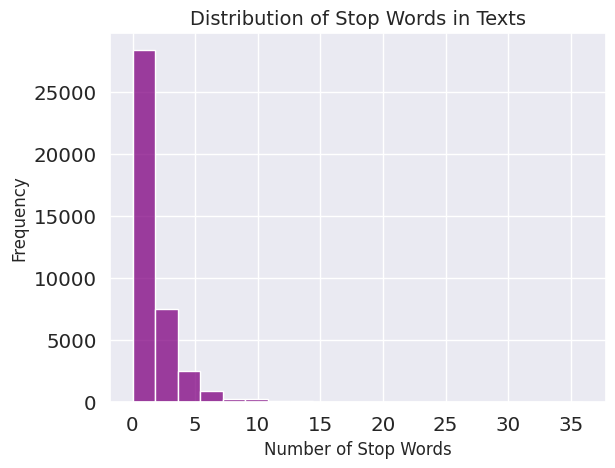

In [ ]:

sns.histplot(df['stop_words'], bins=20, color='purple', kde=False)
plt.title('Distribution of Stop Words in Texts', fontsize=14)
plt.xlabel('Number of Stop Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

df['emoji_count'] = df['review_description'].apply(lambda x: emoji_counter(x))
df.emoji_count.value_counts()[:10]

emoji_count
0    35292
1     1770
2     1150
3      583
4      359
5      217
6      137
7       88
8       67
9       51
Name: count, dtype: int64

In [ ]:
 df.head()

review_description     label company  \
0                                               ÿ±ÿßÿ¶ÿπ  positive  talbat   
1  ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß Ÿäÿ≥ÿßÿπÿØ ÿπŸÑŸâ ÿ™ŸÑÿ®ŸäŸá ÿßŸÑÿßÿ≠ÿ™Ÿäÿßÿ¨ÿßÿ™ ÿ®ÿ¥ŸÉ...  positive  talbat   
2  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß Ÿäÿ∫ÿ™ÿ≠ ÿØÿßÿ¶ŸÖÿß ÿ®Ÿäÿπÿ∑ŸäŸÜŸä ŸÑÿß ŸäŸàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ÿ®ÿß...  negative  talbat   
3                 ŸÑŸÖÿßÿ∞ÿß ŸÑÿß ŸäŸÖŸÉŸÜŸÜÿß ÿ∑ŸÑÿ® ŸÖŸÜ ŸÖÿßŸÉÿØŸàŸÜÿßŸÑÿØÿ≤ÿü  negative  talbat   
4  ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ®Ÿäÿ∏Ÿáÿ± ŸÉŸÑ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ Ÿà ŸÖÿ∫ŸÑŸÇŸá ŸÖÿπ ÿßŸÜŸáÿß ÿ®ÿ™ŸÉŸà...  negative  talbat   

   stop_words  emoji_count  
0           0            0  
1           1            0  
2           1            0  
3           2            0  
4           4            0

In [ ]:
emojis_data = df[df['emoji_count'] > 0]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40017 entries, 0 to 40045
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_description  40017 non-null  object
 1   label               40017 non-null  object
 2   company             40017 non-null  object
 3   stop_words          40017 non-null  int64 
 4   emoji_count         40017 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


In [ ]:
emojis_data

review_description     label    company  \
44                                                     üëé  negative     talbat   
47     ŸÖŸÜ ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ® ÿßŸÑÿ≥Ÿäÿ¶ÿ© ÿ∑ŸÑÿ®ÿ™ ŸÖŸÜ ŸÜŸàÿ± ÿßŸÑÿ®ÿÆÿßÿ±Ÿä (ÿßŸÑÿ®ÿ≠ÿ±ŸäŸÜ...  negative     talbat   
50     ÿ®ÿµÿ±ÿßÿ≠ÿ© ÿ™ÿ∫ŸäŸäÿ± ŸÉÿ®Ÿäÿ± ŸÅŸä ÿ≥Ÿäÿßÿ≥ÿ© ÿ∑ŸÑÿ®ÿßÿ™ ŸÖÿπ ÿßŸÑÿ≤ÿ®ÿßÿ¶ŸÜÿå Ÿá...   neutral     talbat   
67                               Wo üôåüôåüíãüíãüíãüíãüíãüíãüíôüíôüíô‚ù§‚ù§üíñüíñüíñüëçüëçüëçüëå  positive     talbat   
71                      ÿ¨ÿ≠ŸáŸÜŸÜÿßÿ∫ŸÜŸÖÿ¨ÿ∏ ÿ¨ÿ≠ÿÆÿ™ÿßŸâÿ©ÿ≤ŸàŸÜŸáüòãüòãüòãüòãüòãüòãüòãüòãüòã  negative     talbat   
...                                                  ...       ...        ...   
39906                                ÿ¥ÿ±ŸÉŸá ŸÖŸÜÿ∏ŸÖŸá ŸàŸÖÿ≠ÿ™ÿ±ŸÖŸá‚ù§  positive  Ezz Steel   
39914  \nŸÖÿ§ÿÆÿ±ÿß ÿ®ŸÇŸâ ÿ≤Ÿä ÿßŸÑÿ≤ŸÅÿ™ ÿ≠ŸÇŸäŸÇŸä\n:ÿßÿÆÿ± ŸÖŸàÿßŸÇŸÅ ÿßÿ™ÿπÿ±ÿ∂ÿ™ŸÑ...  negative       swvl   
40024  ÿßŸÜÿß ÿ™ŸÇÿ±Ÿäÿ®ÿß ŸÉŸÑ ÿ±ÿ≠ŸÑÿ© ÿ®ÿ±ŸÉÿ®Ÿáÿß ÿ®Ÿäÿ®ŸÇŸâ ŸÅŸâ ÿ™ÿ£ÿÆŸäÿ± ÿ≠ŸàÿßŸÑŸâ...  negative       swvl   
40037  ÿßŸÑÿÆÿØŸÖÿ© ÿ¨ŸäÿØÿ© ŸàŸÑŸÉŸÜ Ÿäÿ±ÿ¨Ÿâ ÿ™ÿπÿØŸäŸÑ ÿ≥ŸÑŸàŸÉ ÿ®ÿπÿ∂ ÿßŸÑÿ≥ÿßÿ¶ŸÇŸäŸÜ ...  positive       swvl   
40042  ÿßŸÜÿß ÿ≥ÿßŸÉŸÜÿ© ÿ®ŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸÉŸäŸÜÿ¨ ŸàŸÑÿß ÿ™Ÿàÿ¨ÿØ ÿπÿ±ÿ®Ÿäÿßÿ™ ŸÇÿ®ŸÑ ÿßŸÑ...  negative       swvl   

       stop_words  emoji_count  
44              0            1  
47              7            2  
50              5            1  
67              0           20  
71              0            9  
...           ...          ...  
39906           0            1  
39914          14            1  
40024           2            4  
40037           2            2  
40042           2            3  

[4725 rows x 5 columns]

In [ ]:
df = df.drop(df[df['review_description'] == "ÿ¨ÿ≠ŸáŸÜŸÜÿßÿ∫ŸÜŸÖÿ¨ÿ∏ ÿ¨ÿ≠ÿÆÿ™ÿßŸâÿ©ÿ≤ŸàŸÜŸáüòãüòãüòãüòãüòãüòãüòãüòãüòã"].index)


In [ ]:
emojis_data

review_description     label    company  \
44                                                     üëé  negative     talbat   
47     ŸÖŸÜ ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ® ÿßŸÑÿ≥Ÿäÿ¶ÿ© ÿ∑ŸÑÿ®ÿ™ ŸÖŸÜ ŸÜŸàÿ± ÿßŸÑÿ®ÿÆÿßÿ±Ÿä (ÿßŸÑÿ®ÿ≠ÿ±ŸäŸÜ...  negative     talbat   
50     ÿ®ÿµÿ±ÿßÿ≠ÿ© ÿ™ÿ∫ŸäŸäÿ± ŸÉÿ®Ÿäÿ± ŸÅŸä ÿ≥Ÿäÿßÿ≥ÿ© ÿ∑ŸÑÿ®ÿßÿ™ ŸÖÿπ ÿßŸÑÿ≤ÿ®ÿßÿ¶ŸÜÿå Ÿá...   neutral     talbat   
67                               Wo üôåüôåüíãüíãüíãüíãüíãüíãüíôüíôüíô‚ù§‚ù§üíñüíñüíñüëçüëçüëçüëå  positive     talbat   
71                      ÿ¨ÿ≠ŸáŸÜŸÜÿßÿ∫ŸÜŸÖÿ¨ÿ∏ ÿ¨ÿ≠ÿÆÿ™ÿßŸâÿ©ÿ≤ŸàŸÜŸáüòãüòãüòãüòãüòãüòãüòãüòãüòã  negative     talbat   
...                                                  ...       ...        ...   
39906                                ÿ¥ÿ±ŸÉŸá ŸÖŸÜÿ∏ŸÖŸá ŸàŸÖÿ≠ÿ™ÿ±ŸÖŸá‚ù§  positive  Ezz Steel   
39914  \nŸÖÿ§ÿÆÿ±ÿß ÿ®ŸÇŸâ ÿ≤Ÿä ÿßŸÑÿ≤ŸÅÿ™ ÿ≠ŸÇŸäŸÇŸä\n:ÿßÿÆÿ± ŸÖŸàÿßŸÇŸÅ ÿßÿ™ÿπÿ±ÿ∂ÿ™ŸÑ...  negative       swvl   
40024  ÿßŸÜÿß ÿ™ŸÇÿ±Ÿäÿ®ÿß ŸÉŸÑ ÿ±ÿ≠ŸÑÿ© ÿ®ÿ±ŸÉÿ®Ÿáÿß ÿ®Ÿäÿ®ŸÇŸâ ŸÅŸâ ÿ™ÿ£ÿÆŸäÿ± ÿ≠ŸàÿßŸÑŸâ...  negative       swvl   
40037  ÿßŸÑÿÆÿØŸÖÿ© ÿ¨ŸäÿØÿ© ŸàŸÑŸÉŸÜ Ÿäÿ±ÿ¨Ÿâ ÿ™ÿπÿØŸäŸÑ ÿ≥ŸÑŸàŸÉ ÿ®ÿπÿ∂ ÿßŸÑÿ≥ÿßÿ¶ŸÇŸäŸÜ ...  positive       swvl   
40042  ÿßŸÜÿß ÿ≥ÿßŸÉŸÜÿ© ÿ®ŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸÉŸäŸÜÿ¨ ŸàŸÑÿß ÿ™Ÿàÿ¨ÿØ ÿπÿ±ÿ®Ÿäÿßÿ™ ŸÇÿ®ŸÑ ÿßŸÑ...  negative       swvl   

       stop_words  emoji_count  
44              0            1  
47              7            2  
50              5            1  
67              0           20  
71              0            9  
...           ...          ...  
39906           0            1  
39914          14            1  
40024           2            4  
40037           2            2  
40042           2            3  

[4725 rows x 5 columns]

In [ ]:
def extract_emoji(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(emoji.distinct_emoji_list(char) for char in word):
            emoji_list.append(word)

    return emoji_list


In [ ]:
emojis_data['emoji'] = emojis_data['review_description'].apply(lambda x: extract_emoji(x))
emojis_data['emoji'] = emojis_data['emoji'].apply(lambda x: ' '.join([word for word in x ]))


In [ ]:
emojis_data

review_description     label    company  \
44                                                     üëé  negative     talbat   
47     ŸÖŸÜ ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ® ÿßŸÑÿ≥Ÿäÿ¶ÿ© ÿ∑ŸÑÿ®ÿ™ ŸÖŸÜ ŸÜŸàÿ± ÿßŸÑÿ®ÿÆÿßÿ±Ÿä (ÿßŸÑÿ®ÿ≠ÿ±ŸäŸÜ...  negative     talbat   
50     ÿ®ÿµÿ±ÿßÿ≠ÿ© ÿ™ÿ∫ŸäŸäÿ± ŸÉÿ®Ÿäÿ± ŸÅŸä ÿ≥Ÿäÿßÿ≥ÿ© ÿ∑ŸÑÿ®ÿßÿ™ ŸÖÿπ ÿßŸÑÿ≤ÿ®ÿßÿ¶ŸÜÿå Ÿá...   neutral     talbat   
67                               Wo üôåüôåüíãüíãüíãüíãüíãüíãüíôüíôüíô‚ù§‚ù§üíñüíñüíñüëçüëçüëçüëå  positive     talbat   
71                      ÿ¨ÿ≠ŸáŸÜŸÜÿßÿ∫ŸÜŸÖÿ¨ÿ∏ ÿ¨ÿ≠ÿÆÿ™ÿßŸâÿ©ÿ≤ŸàŸÜŸáüòãüòãüòãüòãüòãüòãüòãüòãüòã  negative     talbat   
...                                                  ...       ...        ...   
39906                                ÿ¥ÿ±ŸÉŸá ŸÖŸÜÿ∏ŸÖŸá ŸàŸÖÿ≠ÿ™ÿ±ŸÖŸá‚ù§  positive  Ezz Steel   
39914  \nŸÖÿ§ÿÆÿ±ÿß ÿ®ŸÇŸâ ÿ≤Ÿä ÿßŸÑÿ≤ŸÅÿ™ ÿ≠ŸÇŸäŸÇŸä\n:ÿßÿÆÿ± ŸÖŸàÿßŸÇŸÅ ÿßÿ™ÿπÿ±ÿ∂ÿ™ŸÑ...  negative       swvl   
40024  ÿßŸÜÿß ÿ™ŸÇÿ±Ÿäÿ®ÿß ŸÉŸÑ ÿ±ÿ≠ŸÑÿ© ÿ®ÿ±ŸÉÿ®Ÿáÿß ÿ®Ÿäÿ®ŸÇŸâ ŸÅŸâ ÿ™ÿ£ÿÆŸäÿ± ÿ≠ŸàÿßŸÑŸâ...  negative       swvl   
40037  ÿßŸÑÿÆÿØŸÖÿ© ÿ¨ŸäÿØÿ© ŸàŸÑŸÉŸÜ Ÿäÿ±ÿ¨Ÿâ ÿ™ÿπÿØŸäŸÑ ÿ≥ŸÑŸàŸÉ ÿ®ÿπÿ∂ ÿßŸÑÿ≥ÿßÿ¶ŸÇŸäŸÜ ...  positive       swvl   
40042  ÿßŸÜÿß ÿ≥ÿßŸÉŸÜÿ© ÿ®ŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸÉŸäŸÜÿ¨ ŸàŸÑÿß ÿ™Ÿàÿ¨ÿØ ÿπÿ±ÿ®Ÿäÿßÿ™ ŸÇÿ®ŸÑ ÿßŸÑ...  negative       swvl   

       stop_words  emoji_count                                    emoji  
44              0            1                                        üëé  
47              7            2                                      üò° üò°  
50              5            1                                        üåπ  
67              0           20  üôå üôå üíã üíã üíã üíã üíã üíã üíô üíô üíô ‚ù§ ‚ù§ üíñ üíñ üíñ üëç üëç üëç üëå  
71              0            9                        üòã üòã üòã üòã üòã üòã üòã üòã üòã  
...           ...          ...                                      ...  
39906           0            1                                        ‚ù§  
39914          14            1                                        üòÇ  
40024           2            4                                  ü•µ ü•µ üò° üò°  
40037           2            2                                      üôÇ üåº  
40042           2            3                                    üòè üòè üòè  

[4725 rows x 6 columns]

In [ ]:
pd.Series(' '.join(emojis_data['emoji']).split()).value_counts()[:10]


üëç     1482
üòç     1370
‚ù§     1121
‚ù§Ô∏è    1091
üëé      928
üò°      638
üòò      634
üò†      509
üëå      472
üòÇ      349
Name: count, dtype: int64

In [ ]:
emojis = {
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "üòÇ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üíî":"ŸÇŸÑÿ® ÿ≠ÿ≤ŸäŸÜ",
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "‚ù§Ô∏è":"ÿ≠ÿ®",
    "‚ù§":"ÿ≠ÿ®",
    "üòç":"ÿ≠ÿ®",
    "üò≠":"Ÿäÿ®ŸÉŸä",
    "üò¢":"ÿ≠ÿ≤ŸÜ",
    "üòî":"ÿ≠ÿ≤ŸÜ",
    "‚ô•":"ÿ≠ÿ®",
    "üíú":"ÿ≠ÿ®",
    "üòÖ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üôÅ":"ÿ≠ÿ≤ŸäŸÜ",
    "üíï":"ÿ≠ÿ®",
    "üíô":"ÿ≠ÿ®",
    "üòû":"ÿ≠ÿ≤ŸäŸÜ",
    "üòä":"ÿ≥ÿπÿßÿØÿ©",
    "üëè":"ŸäÿµŸÅŸÇ",
    "üëå":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "üò¥":"ŸäŸÜÿßŸÖ",
    "üòÄ":"Ÿäÿ∂ÿ≠ŸÉ",
 "üòå":"ÿ≠ÿ≤ŸäŸÜ",
    "üåπ":"Ÿàÿ±ÿØÿ©",
    "üôà":"ÿ≠ÿ®",
    "üòÑ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòê":"ŸÖÿ≠ÿßŸäÿØ",
    "‚úå":"ŸÖŸÜÿ™ÿµÿ±",
    "‚ú®":"ŸÜÿ¨ŸÖŸá",
    "ü§î":"ÿ™ŸÅŸÉŸäÿ±",
    "üòè":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üòí":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üôÑ":"ŸÖŸÑŸÑ",
    "üòï":"ÿπÿµÿ®Ÿäÿ©",
    "üòÉ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üå∏":"Ÿàÿ±ÿØÿ©",
    "üòì":"ÿ≠ÿ≤ŸÜ",
    "üíû":"ÿ≠ÿ®",
    "üíó":"ÿ≠ÿ®",
    "üòë":"ŸÖŸÜÿ≤ÿπÿ¨",
    "üí≠":"ÿ™ŸÅŸÉŸäÿ±",
    "üòé":"ÿ´ŸÇÿ©",
    "üíõ":"ÿ≠ÿ®",
    "üò©":"ÿ≠ÿ≤ŸäŸÜ",
    "üí™":"ÿπÿ∂ŸÑÿßÿ™",
    "üëç":"ŸÖŸàÿßŸÅŸÇ",
    "üôèüèª":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üò≥":"ŸÖÿµÿØŸàŸÖ",
    "üëèüèº":"ÿ™ÿµŸÅŸäŸÇ",
    "üé∂":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üåö":"ÿµŸÖÿ™",
    "üíö":"ÿ≠ÿ®",
    "üôè":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíò":"ÿ≠ÿ®",
    "üçÉ":"ÿ≥ŸÑÿßŸÖ",
    "‚ò∫":"Ÿäÿ∂ÿ≠ŸÉ",
    "üê∏":"ÿ∂ŸÅÿØÿπ",
    "üò∂":"ŸÖÿµÿØŸàŸÖ",
    "‚úåÔ∏è":"ŸÖÿ±ÿ≠",
    "‚úãüèª":"ÿ™ŸàŸÇŸÅ",
    "üòâ":"ÿ∫ŸÖÿ≤ÿ©",
    "üå∑":"ÿ≠ÿ®",
    "üôÉ":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "üò´":"ÿ≠ÿ≤ŸäŸÜ",
    "üò®":"ŸÖÿµÿØŸàŸÖ",
    "üéº ":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üçÅ":"ŸÖÿ±ÿ≠",
    "üçÇ":"ŸÖÿ±ÿ≠",
    "üíü":"ÿ≠ÿ®",
    "üò™":"ÿ≠ÿ≤ŸÜ",
    "üòÜ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üò£":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "‚ò∫Ô∏è":"ÿ≠ÿ®",
    "üò±":"ŸÉÿßÿ±ÿ´ÿ©",
    "üòÅ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòñ":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üèÉüèº":"Ÿäÿ¨ÿ±Ÿä",
    "üò°":"ÿ∫ÿ∂ÿ®",
    "üö∂":"Ÿäÿ≥Ÿäÿ±",
    "ü§ï":"ŸÖÿ±ÿ∂",
    "‚ÄºÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üïä":"ÿ∑ÿßÿ¶ÿ±",
    "üëåüèª":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚ù£":"ÿ≠ÿ®",
    "üôä":"ŸÖÿµÿØŸàŸÖ",
    "üíÉ":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üíÉüèº":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üòú":"ŸÖÿ±ÿ≠",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "üòü":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üíñ":"ÿ≠ÿ®",
    "üò•":"ÿ≠ÿ≤ŸÜ",
    "üéª":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚úí":"ŸäŸÉÿ™ÿ®",
    "üö∂üèª":"Ÿäÿ≥Ÿäÿ±",
    "üíé":"ÿßŸÑŸÖÿßÿ∏",
    "üò∑":"Ÿàÿ®ÿßÿ° ŸÖÿ±ÿ∂",
    "‚òù":"Ÿàÿßÿ≠ÿØ",
    "üö¨":"ÿ™ÿØÿÆŸäŸÜ",
    "üíê" : "Ÿàÿ±ÿØ",
    "üåû" : "ÿ¥ŸÖÿ≥",
    "üëÜ" : "ÿßŸÑÿßŸàŸÑ",
    "‚ö†Ô∏è" :"ÿ™ÿ≠ÿ∞Ÿäÿ±",
    "ü§ó" : "ÿßÿ≠ÿ™Ÿàÿßÿ°",
    "‚úñÔ∏è": "ÿ∫ŸÑÿ∑",
    "üìç"  : "ŸÖŸÉÿßŸÜ",
    "üë∏" : "ŸÖŸÑŸÉŸá",
    "üëë" : "ÿ™ÿßÿ¨",
    "‚úîÔ∏è" : "ÿµÿ≠",
    "üíå": "ŸÇŸÑÿ®",
     "üò≤" : "ŸÖŸÜÿØŸáÿ¥",
    "üí¶": "ŸÖÿßÿ°",
    "üö´" : "ÿÆÿ∑ÿß",
    "üëèüèª" : "ÿ®ÿ±ÿßŸÅŸà",
    "üèä" :"Ÿäÿ≥ÿ®ÿ≠",
    "üëçüèª": "ÿ™ŸÖÿßŸÖ",
    "‚≠ïÔ∏è" :"ÿØÿßÿ¶ÿ±Ÿá ŸÉÿ®Ÿäÿ±Ÿá",
    "üé∑" : "ÿ≥ÿßŸÉÿ≥ŸÅŸàŸÜ",
    "üëã": "ÿ™ŸÑŸàŸäÿ≠ ÿ®ÿßŸÑŸäÿØ",
    "‚úåüèº": "ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",
    "üåù":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "‚ûø"  : "ÿπŸÇÿØŸá ŸÖÿ≤ÿØŸàÿ¨Ÿá",
    "üí™üèº" : "ŸÇŸàŸä",
    "üì©":  "ÿ™ŸàÿßÿµŸÑ ŸÖÿπŸä",
    "‚òïÔ∏è": "ŸÇŸáŸàŸá",
    "üòß" : "ŸÇŸÑŸÇ Ÿà ÿµÿØŸÖÿ©",
    "üó®": "ÿ±ÿ≥ÿßŸÑÿ©",
    "‚ùóÔ∏è" :"ÿ™ÿπÿ¨ÿ®",
    "üôÜüèª": "ÿßÿ¥ÿßÿ±Ÿá ŸÖŸàÿßŸÅŸÇŸá",
    "üëØ" :"ÿßÿÆŸàÿßÿ™",
    "¬©" :  "ÿ±ŸÖÿ≤",
    "üëµüèΩ" :"ÿ≥ŸäÿØŸá ÿπÿ¨Ÿàÿ≤Ÿá",
    "üê£": "ŸÉÿ™ŸÉŸàÿ™",
    "üôå": "ÿ™ÿ¥ÿ¨Ÿäÿπ",
    "üôá": "ÿ¥ÿÆÿµ ŸäŸÜÿ≠ŸÜŸä",
    "üëêüèΩ":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",
    "üëåüèΩ": "ÿ®ÿßŸÑÿ∏ÿ®ÿ∑",
    "‚ÅâÔ∏è" : "ÿßÿ≥ÿ™ŸÜŸÉÿßÿ±",
    "‚öΩÔ∏è": "ŸÉŸàÿ±Ÿá",
    "üï∂" :"ÿ≠ÿ®",
    "üéà" :"ÿ®ÿßŸÑŸàŸÜ",
    "üéÄ":    "Ÿàÿ±ÿØŸá",
    "üíµ":  "ŸÅŸÑŸàÿ≥",
    "üòã":  "ÿ¨ÿßÿ¶ÿπ",
    "üòõ":  "Ÿäÿ∫Ÿäÿ∏",
    "üò†":  "ÿ∫ÿßÿ∂ÿ®",
    "‚úçüèª":  "ŸäŸÉÿ™ÿ®",
    "üåæ":  "ÿßÿ±ÿ≤",
    "üë£":  "ÿßÿ´ÿ± ŸÇÿØŸÖŸäŸÜ",
    "‚ùå":"ÿ±ŸÅÿ∂",
    "üçü":"ÿ∑ÿπÿßŸÖ",
    "üë¨":"ÿµÿØÿßŸÇÿ©",
    "üê∞":"ÿßÿ±ŸÜÿ®",
    "‚òÇ":"ŸÖÿ∑ÿ±",
     "‚öú":"ŸÖŸÖŸÑŸÉÿ© ŸÅÿ±ŸÜÿ≥ÿß",
    "üêë":"ÿÆÿ±ŸàŸÅ",
    "üó£":"ÿµŸàÿ™ ŸÖÿ±ÿ™ŸÅÿπ",
    "üëåüèº":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚òò":"ŸÖÿ±ÿ≠",
    "üòÆ":"ÿµÿØŸÖÿ©",
    "üò¶":"ŸÇŸÑŸÇ",
    "‚≠ï":"ÿßŸÑÿ≠ŸÇ",
    "‚úèÔ∏è":"ŸÇŸÑŸÖ",
    "‚Ñπ":"ŸÖÿπŸÑŸàŸÖÿßÿ™",
    "üôçüèª":"ÿ±ŸÅÿ∂",
    "‚ö™Ô∏è":"ŸÜÿ∂ÿßÿ±ÿ© ŸÜŸÇÿßÿ°",
    "üê§":"ÿ≠ÿ≤ŸÜ",
    "üí´":"ŸÖÿ±ÿ≠",
    "üíù":"ÿ≠ÿ®",
    "üçî":"ÿ∑ÿπÿßŸÖ",
    "‚ù§Ô∏é":"ÿ≠ÿ®",
    "‚úàÔ∏è":"ÿ≥ŸÅÿ±",
    "üèÉüèª‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üç≥":"ÿ∞ŸÉÿ±",
    "üé§":"ŸÖÿßŸäŸÉ ÿ∫ŸÜÿßÿ°",
    "üéæ":"ŸÉÿ±Ÿá",
    "üêî":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üôã":"ÿ≥ÿ§ÿßŸÑ",
    "üìÆ":"ÿ®ÿ≠ÿ±",
    "üíâ":"ÿØŸàÿßÿ°",
    "üôèüèº":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíÇüèø ":"ÿ≠ÿßÿ±ÿ≥",
    "üé¨":"ÿ≥ŸäŸÜŸÖÿß",
    "‚ô¶Ô∏è":"ŸÖÿ±ÿ≠",
    "üí°":"ŸÇŸÉÿ±ÿ©",
    "‚Äº":"ÿ™ÿπÿ¨ÿ®",
    "üëº":"ÿ∑ŸÅŸÑ",
    "üîë":"ŸÖŸÅÿ™ÿßÿ≠",
    "‚ô•Ô∏è":"ÿ≠ÿ®",
    "üïã":"ŸÉÿπÿ®ÿ©",
    "üêì":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üí©":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üëΩ":"ŸÅÿ∂ÿßÿ¶Ÿä",
    "‚òîÔ∏è":"ŸÖÿ∑ÿ±",
    "üç∑":"ÿπÿµŸäÿ±",
    "üåü":"ŸÜÿ¨ŸÖÿ©",
    "‚òÅÔ∏è":"ÿ≥ÿ≠ÿ®",
    "üëÉ":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üå∫":"ŸÖÿ±ÿ≠",
     "üî™":"ÿ≥ŸÉŸäŸÜÿ©",
    "‚ô®":"ÿ≥ÿÆŸàŸÜŸäÿ©",
    "üëäüèº":"ÿ∂ÿ±ÿ®",
    "‚úè":"ŸÇŸÑŸÖ",
    "üö∂üèæ‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "‚óæÔ∏è":"ŸàŸÇŸÅ",
    "üòö":"ÿ≠ÿ®",
    "üî∏":"ŸÖÿ±ÿ≠",
    "üëéüèª":"ŸÑÿß Ÿäÿπÿ¨ÿ®ŸÜŸä",
    "üëäüèΩ":"ÿ∂ÿ±ÿ®ÿ©",
    "üòô":"ÿ≠ÿ®",
    "üé•":"ÿ™ÿµŸàŸäÿ±",
    "üëâ":"ÿ¨ÿ∞ÿ® ÿßŸÜÿ™ÿ®ÿßŸá",
    "üëèüèΩ":"ŸäÿµŸÅŸÇ",
    "üí™üèª":"ÿπÿ∂ŸÑÿßÿ™",
    "üè¥":"ÿßÿ≥ŸàÿØ",
    "üî•":"ÿ≠ÿ±ŸäŸÇ",
    "üò¨":"ÿπÿØŸÖ ÿßŸÑÿ±ÿßÿ≠ÿ©",
    "üëäüèø":"Ÿäÿ∂ÿ±ÿ®",
    "üåø":"Ÿàÿ±ŸÇŸá ÿ¥ÿ¨ÿ±Ÿá",
     "‚úãüèº":"ŸÉŸÅ ÿßŸäÿØ",
    "üëê":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",
    "‚ò†Ô∏è":"Ÿàÿ¨Ÿá ŸÖÿ±ÿπÿ®",
    "üéâ":"ŸäŸáŸÜÿ¶",
    "üîï" :"ÿµÿßŸÖÿ™",
    "üòø":"Ÿàÿ¨Ÿá ÿ≠ÿ≤ŸäŸÜ",
    "‚òπÔ∏è":"Ÿàÿ¨Ÿá Ÿäÿßÿ¶ÿ≥",
    "üòò" :"ÿ≠ÿ®",
    "üò∞" :"ÿÆŸàŸÅ Ÿà ÿ≠ÿ≤ŸÜ",
    "üåº":"Ÿàÿ±ÿØŸá",
    "üíã":  "ÿ®Ÿàÿ≥Ÿá",
    "üëá":"ŸÑÿßÿ≥ŸÅŸÑ",
    "‚ù£Ô∏è":"ÿ≠ÿ®",
    "üéß":"ÿ≥ŸÖÿßÿπÿßÿ™",
    "üìù":"ŸäŸÉÿ™ÿ®",
    "üòá":"ÿØÿßŸäÿÆ",
    "üòà":"ÿ±ÿπÿ®",
    "üèÉ":"Ÿäÿ¨ÿ±Ÿä",
    "‚úåüèª":"ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",
    "üî´":"Ÿäÿ∂ÿ±ÿ®",
    "‚ùóÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üëé":"ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ",
    "üîê":"ŸÇŸÅŸÑ",
    "üëà":"ŸÑŸÑŸäŸÖŸäŸÜ",
    "‚Ñ¢":"ÿ±ŸÖÿ≤",
    "üö∂üèΩ":"Ÿäÿ™ŸÖÿ¥Ÿä",
    "üòØ":"ŸÖÿ™ŸÅÿßÿ¨ÿ£",
    "‚úä":"ŸäÿØ ŸÖÿ∫ŸÑŸÇŸá",
    "üòª":"ÿßÿπÿ¨ÿßÿ®",
    "üôâ" :"ŸÇÿ±ÿØ",
    "üëß":"ÿ∑ŸÅŸÑŸá ÿµÿ∫Ÿäÿ±Ÿá",
    "üî¥":"ÿØÿßÿ¶ÿ±Ÿá ÿ≠ŸÖÿ±ÿßÿ°",
    "üí™üèΩ":"ŸÇŸàŸá",
    "üí§":"ŸäŸÜÿßŸÖ",
    "üëÄ":"ŸäŸÜÿ∏ÿ±",
    "‚úçüèª":"ŸäŸÉÿ™ÿ®",
    "‚ùÑÔ∏è":"ÿ™ŸÑÿ¨",
    "üíÄ":"ÿ±ÿπÿ®",
    "üò§":"Ÿàÿ¨Ÿá ÿπÿßÿ®ÿ≥",
    "üñã":"ŸÇŸÑŸÖ",
    "üé©":"ŸÉÿßÿ®",
     "‚òïÔ∏è":"ŸÇŸáŸàŸá",
    "üòπ":"ÿ∂ÿ≠ŸÉ",
    "üíì":"ÿ≠ÿ®",
    "‚òÑÔ∏è ":"ŸÜÿßÿ±",
    "üëª":"ÿ±ÿπÿ®",
    }

emoticons_to_emoji = {
    ":)" : "üôÇ",
    ":(" : "üôÅ",
    "xD" : "üòÜ",
    ":=(": "üò≠",
    ":'(": "üò¢",
    ":'‚Äë(": "üò¢",
    "XD" : "üòÇ",
    ":D" : "üôÇ",
    "‚ô¨" : "ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚ô°" : "‚ù§",
    "‚òª"  : "üôÇ",
    }

**Cleaning**

In [ ]:
def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

In [ ]:
!pip install nltk

In [ ]:
def ISRI_Stemmer(text):
    #making an object
    stemmer = ISRIStemmer()

    #stemming each word
    text = stemmer.stem(text)
    text = stemmer.pre32(text)
    text = stemmer.suf32(text)

    return text

def Snowball_stemmer(text):
    text = text.split()
    #making an object
    stemmer = SnowballStemmer("arabic")

    #stemming each word
    text=[stemmer.stem(y) for y in text]

    return " " .join(text)

def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()

    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]

    return " " .join(text)

In [ ]:
text = "ÿßŸÑŸÖŸÉÿ™ÿ®ÿ© ŸÉÿßŸÜÿ™ ÿ¨ŸÖŸäŸÑÿ©"
result = ISRI_Stemmer(text)
result


'ŸÖŸÉÿ™ÿ®ÿ© ŸÉÿßŸÜÿ™ ÿ¨ŸÖŸäŸÑÿ©'

In [ ]:
text = "ÿßŸÑŸÖŸÉÿ™ÿ®ÿ© ŸÉÿßŸÜÿ™ ÿ¨ŸÖŸäŸÑÿ©"
result = Snowball_stemmer(text)
result

'ŸÖŸÉÿ™ÿ® ŸÉÿßŸÜ ÿ¨ŸÖŸäŸÑ'

In [ ]:
text = "ÿßŸÑŸÖŸÉÿ™ÿ®ÿ© ŸÉÿßŸÜÿ™ ÿ¨ŸÖŸäŸÑÿ©"
result = Arabic_Light_Stemmer(text)
result

'ŸÖŸÉÿ™ÿ® ÿßŸÜÿ™ ÿ¨ŸÖŸäŸÑ'

In [ ]:
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("Ÿâ", "Ÿä", text)
    text = re.sub("ÿ§", "ÿ°", text)
    text = re.sub("ÿ¶", "ÿ°", text)
    text = re.sub("Ÿá","ÿ©",text)

    text = re.sub("[ÿ•ÿ£Ÿ±ÿ¢ÿß]", "ÿß", text)
    text = text.replace('ŸàŸà', 'Ÿà')
    text = text.replace('ŸäŸä', 'Ÿä')
    text = text.replace('ŸäŸäŸä', 'Ÿä')
    text = text.replace('ÿßÿß', 'ÿß')

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)

    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text)

    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)

    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

In [ ]:
def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,ÿå-./:;<=>ÿü?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('ÿõ',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emoji(string):

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string).strip()


In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text).strip()



def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.review_description.iloc[i].split()) < 3:
            df.review_description.iloc[i] = np.nan


In [ ]:
def replace_emoticon_with_emojis(text):
    for i in range (len(text)):
        message = text.iloc[i]
        seperarate_word = message.split(' ')
        cleaned_df.review_description.iloc[i] = ""

        for word in seperarate_word:
            text.iloc[i] += emoticons_to_emoji.get(word, word) + " "


In [ ]:
def replace_emojis_with_text(text):
    for i in range (len(text)):
            message = text.iloc[i]
            seperarate_word = regex.findall(r'\X', message)
            text.iloc[i] = ""

            for word in seperarate_word:
                if any(emoji.distinct_emoji_list(char)  for char in word):
                        text.iloc[i] += " " + emojis.get(word, word) + " "
                else:
                        text.iloc[i] +=  emojis.get(word, word) + ""

def space_between_emojis(s):
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)


In [ ]:
def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text

In [ ]:
cleaned_df = df

In [ ]:
df.iloc[0].review_description


'ÿ±ÿßÿ¶ÿπ'

In [ ]:
cleaned_df.iloc[0].review_description

'ÿ±ÿßÿ¶ÿπ'

In [ ]:
replace_emoticon_with_emojis(cleaned_df.review_description)

In [ ]:
# make a new column for emojis only

cleaned_df['only_emojis'] = cleaned_df['review_description'].apply(lambda x: extract_emoji(str(x)))
cleaned_df['only_emojis'] = cleaned_df['only_emojis'].apply(lambda x: ' '.join(x))

# remove emojis for column review_description
def remove_emojis_from_text(text):
    data = regex.findall(r'\X', text)
    return ''.join([char for char in data if not any(emoji.distinct_emoji_list(c) for c in char)])

cleaned_df['review_description'] = cleaned_df['review_description'].apply(lambda x: remove_emojis_from_text(str(x)))


In [ ]:
cleaned_df

In [ ]:
cleaned_df.text=cleaned_df.review_description.apply(lambda text : remove_stop_words(text))


In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : Removing_non_arabic(text))


In [ ]:
df.review_description.iloc[1]

In [ ]:
cleaned_df.iloc[1].review_description

In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : normalizeArabic(text))


In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : Removing_numbers(text))


In [ ]:
cleaned_df.iloc[1].review_description

In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : remove_hashtages_and_mentions(text))


In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : Removing_punctuations(text))


In [ ]:
cleaned_df

In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : ISRI_Stemmer(text))


In [ ]:
cleaned_df.duplicated().sum()

In [ ]:
cleaned_df.duplicated().sum()

In [ ]:
cleaned_df=cleaned_df.drop_duplicates()

In [ ]:
cleaned_df.duplicated().sum()

In [ ]:
cleaned_df.head()

In [ ]:
cleaned_df.isnull().sum()


In [ ]:
import pandas as pd

# ŸÖÿ´ÿßŸÑ: ŸÑŸà ÿπŸÜÿØŸÉ DataFrame ÿßÿ≥ŸÖŸá cleaned_df
cleaned_df.to_csv("/content/cleaned_df.csv", index=False,encoding='utf-8-sig')


In [ ]:
from IPython.display import FileLink

FileLink("/content/cleaned_df.csv")

/content/cleaned_df.csv

In [ ]:
!pip install python-bidi arabic-reshaper

# K_mean

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 2: Generate Synthetic Data
X, y_true = make_blobs(n_samples=600, centers=3, cluster_std=0.70, random_state=0)

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load and clean data
df = pd.read_csv('/content/cleaned_df (2).csv')
df = df.dropna(subset=['review_description'])

# Vectorize text
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['review_description']).toarray()

# K-Means from scratch functions
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[indices]

def compute_distances(X, centroids):
    return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

def assign_clusters(distances):
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        distances = compute_distances(X, centroids)
        labels = assign_clusters(distances)
        new_centroids = update_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return centroids, labels

# Run K-Means
centroids, labels = k_means(X, k=3)

# Optional: Add cluster labels to your DataFrame
df['cluster'] = labels


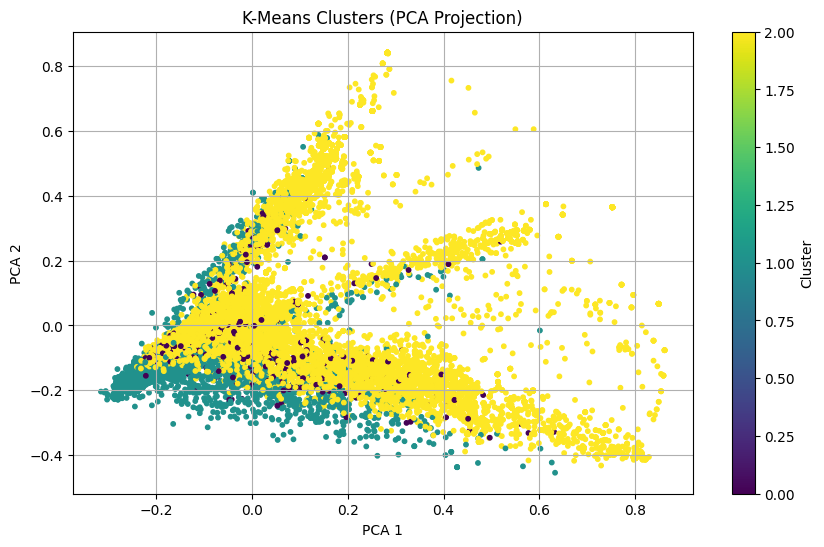

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ÿ™ŸÇŸÑŸäŸÑ ÿßŸÑÿ£ÿ®ÿπÿßÿØ ŸÖŸÜ 100 ÿ•ŸÑŸâ 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# ÿ±ÿ≥ŸÖ ÿßŸÑÿ™ÿ¨ŸÖŸäÿπÿßÿ™ (clusters)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


Silhouette Score: 0.06


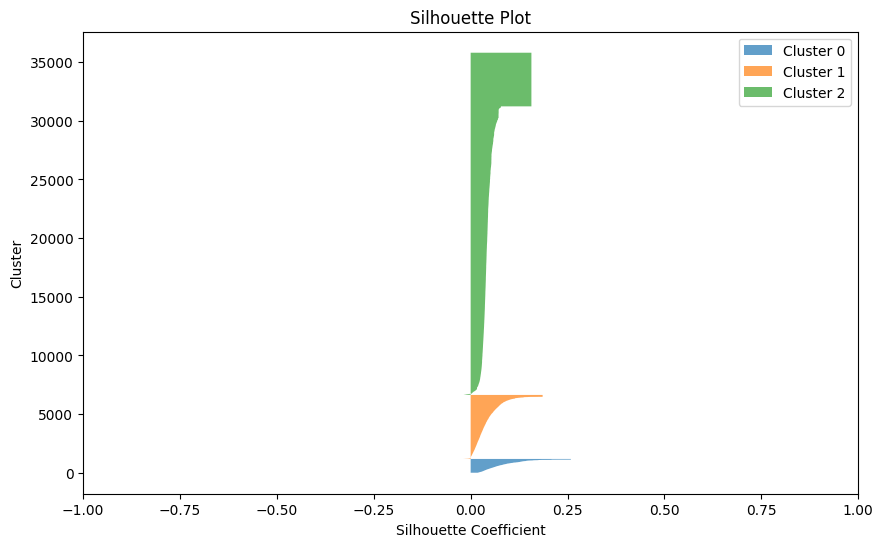

In [ ]:
from sklearn.metrics import silhouette_score

# ÿ≠ÿ≥ÿßÿ® ÿØÿ±ÿ¨ÿ© Silhouette ŸÑŸÑŸÖÿ¨ŸÖŸàÿπÿßÿ™
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.2f}")

# ÿ±ÿ≥ŸÖ ŸÖÿÆÿ∑ÿ∑ Silhouette ŸÑÿπÿ±ÿ∂ ÿßŸÑÿ¨ŸàÿØÿ© ÿßŸÑÿ®ÿµÿ±Ÿäÿ© ŸÑŸÑÿ™ÿ¨ŸÖŸäÿπ
from sklearn.metrics import silhouette_samples
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim([-1, 1])
ax.set_title('Silhouette Plot')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')

sample_silhouette_values = silhouette_samples(X, labels)

y_lower = 10
for i in range(3):  # ÿ®ŸÖÿß ÿ£ŸÜ ŸÑÿØŸäŸÜÿß 3 ŸÖÿ¨ŸÖŸàÿπÿßÿ™
    # ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÜŸÇÿßÿ∑ ÿßŸÑÿÆÿßÿµÿ© ÿ®ŸÉŸÑ ŸÖÿ¨ŸÖŸàÿπÿ©
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    y_upper = y_lower + len(ith_cluster_silhouette_values)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values, alpha=0.7, label=f"Cluster {i}")
    y_lower = y_upper + 10  # ÿ∂ÿπ ŸÅÿ±ÿßÿ∫ ÿ®ŸäŸÜ ÿßŸÑŸÖÿ¨ŸÖŸàÿπÿßÿ™

ax.legend()
plt.show()



#logistic regrision#

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split



In [ ]:
import pandas as pd

cleaned_df =pd.read_csv('/content/cleaned_df (2).csv')

cleaned_df .head()

review_description     label company  \
0                                               ÿ±ÿßÿ°ÿπ  positive  talbat   
1          ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ°ÿπ ÿ¨ÿØ ÿ≥ÿßÿπÿØ ÿπŸÑŸâ ÿ™ŸÑÿ® ÿßÿ≠ÿ™Ÿäÿßÿ¨ ÿ¥ŸÉŸÑ ÿ≥ÿ±ÿπ  positive  talbat   
2  ÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß Ÿäÿ∫ÿ™ÿ≠ ÿØÿßÿ°ŸÖ Ÿäÿπÿ∑ŸäŸÜ ŸÑÿß Ÿàÿ¨ÿØ ÿ™ÿµÿßŸÑ ÿ¥ÿ®ŸÉ ŸÖÿπ ÿßŸÜ...  negative  talbat   
3                        ŸÖÿßÿ∞ ŸÑÿß ŸÖŸÉ ÿ∑ŸÑÿ® ŸÖŸÜ ŸÖÿßŸÉÿØŸàŸÜÿßŸÑÿØÿ≤  negative  talbat   
4  ÿ®ÿ±ŸÜÿßŸÖÿ¨ Ÿäÿ∏ÿ©ÿ± ŸÉŸÑ ŸÖÿ∑ÿßÿπŸÖ Ÿà ŸÖÿ∫ŸÑŸÇ ŸÖÿπ ÿßŸÜÿ© ÿ™ŸÉŸàŸÜ ÿßÿ™ÿ≠ ŸÇÿß...  negative  talbat   

   stop_words  emoji_count only_emojis  
0           0            0         NaN  
1           1            0         NaN  
2           1            0         NaN  
3           2            0         NaN  
4           4            0         NaN

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [ ]:
def compute_cost(X, y, weights):
    m = X.shape[0]
    h = sigmoid(np.dot(X, weights))
    epsilon = 1e-5
    cost = -(1/m) * (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon)))
    return cost

In [ ]:
def train_logistic_regression_with_metrics(X, y, lr=0.1, epochs=1000, X_val=None, y_val=None):
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []
    accuracy_history = []

    for i in range(epochs):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        weights -= lr * gradient

        if i % 10 == 0:
            cost = compute_cost(X, y, weights)
            cost_history.append(cost)

            if X_val is not None:
                y_pred = predict(X_val, weights)
                acc = np.mean(y_pred == y_val)
                accuracy_history.append(acc)

    return weights, cost_history, accuracy_history


In [ ]:
def predict(X, weights):
    probs = sigmoid(np.dot(X, weights))
    return [1 if p >= 0.5 else 0 for p in probs]


In [ ]:
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ÿ£Ÿà ÿßÿ≥ÿ™ÿ®ÿØÿßŸÑŸáÿß ÿ®ŸÜÿµ ŸÅÿßÿ±ÿ∫
cleaned_df['review_description'] = cleaned_df['review_description'].fillna('')

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÜÿµŸàÿµ ÿ•ŸÑŸâ bag of words
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(cleaned_df['review_description']).toarray()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cleaned_df['label'])


In [ ]:
# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
weights, cost_history, accuracy_history = train_logistic_regression_with_metrics(
    X_train, y_train, lr=0.1, epochs=1000, X_val=X_test, y_val=y_test)


In [ ]:
# ÿßŸÑÿ™ŸÜÿ®ÿ§
y_pred = predict(X_test, weights)

In [ ]:
# ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿØŸÇÿ©
accuracy = np.mean(y_pred == y_test)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.18


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

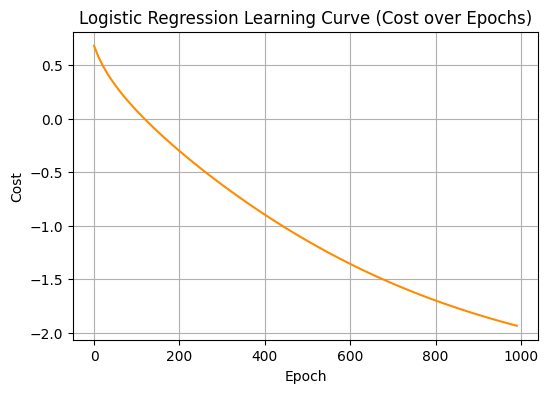

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(0, 1000, 10), cost_history, color='darkorange')
plt.title('Logistic Regression Learning Curve (Cost over Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


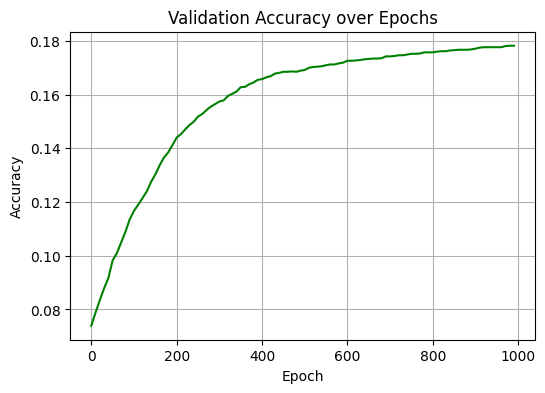

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(0, 1000, 10), accuracy_history, color='green')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [ ]:
softmax_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = softmax_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8205548722153888

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      2736
           1       0.20      0.07      0.10       361
           2       0.83      0.92      0.87      4220

    accuracy                           0.82      7317
   macro avg       0.62      0.58      0.59      7317
weighted avg       0.80      0.82      0.81      7317



#without sklearn.#

In [ ]:
import numpy as np

# ÿØÿßŸÑÿ© Softmax
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # ŸÑŸÑÿßÿ≥ÿ™ŸÇÿ±ÿßÿ± ÿßŸÑÿπÿØÿØŸä
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ŸÑŸâ ŸÖÿµŸÅŸàŸÅÿßÿ™
X = vectorizer.fit_transform(cleaned_df['review_description']).toarray()
y = pd.get_dummies(cleaned_df['label']).values  # ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÅÿ¶ÿßÿ™ ÿ•ŸÑŸâ one-hot encoding

# ÿ™ŸáŸäÿ¶ÿ© ÿßŸÑŸÖÿ™ÿ∫Ÿäÿ±ÿßÿ™
n_features = X.shape[1]
n_classes = y.shape[1]
weights = np.random.randn(n_features, n_classes) * 0.01
bias = np.zeros(n_classes)
learning_rate = 0.01
n_epochs = 1000

# ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
for epoch in range(n_epochs):
    # ÿßŸÑÿ≠ÿ≥ÿßÿ®ÿßÿ™ ÿßŸÑÿ£ŸÖÿßŸÖŸäÿ©
    z = np.dot(X, weights) + bias
    y_pred = softmax(z)

    # ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿÆÿ≥ÿßÿ±ÿ© (Cross-Entropy)
    loss = -np.mean(np.sum(y * np.log(y_pred + 1e-10), axis=1))

    # ÿßŸÑÿ≠ÿ≥ÿßÿ®ÿßÿ™ ÿßŸÑÿπŸÉÿ≥Ÿäÿ© (Gradient Descent)
    grad = y_pred - y
    grad_weights = np.dot(X.T, grad) / X.shape[0]
    grad_bias = np.mean(grad, axis=0)

    # ÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿ£Ÿàÿ≤ÿßŸÜ
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# ÿßŸÑÿ™ŸÜÿ®ÿ§
z = np.dot(X, weights) + bias
y_pred = np.argmax(softmax(z), axis=1)
y_true = np.argmax(y, axis=1)
accuracy = np.mean(y_pred == y_true)
print("Accuracy:", accuracy)

Epoch 0, Loss: 1.0985
Epoch 10, Loss: 1.0783
Epoch 20, Loss: 1.0597
Epoch 30, Loss: 1.0427
Epoch 40, Loss: 1.0270
Epoch 50, Loss: 1.0125
Epoch 60, Loss: 0.9991
Epoch 70, Loss: 0.9866
Epoch 80, Loss: 0.9750
Epoch 90, Loss: 0.9641
Epoch 100, Loss: 0.9540
Epoch 110, Loss: 0.9445
Epoch 120, Loss: 0.9355
Epoch 130, Loss: 0.9271
Epoch 140, Loss: 0.9191
Epoch 150, Loss: 0.9116
Epoch 160, Loss: 0.9045
Epoch 170, Loss: 0.8978
Epoch 180, Loss: 0.8915
Epoch 190, Loss: 0.8854
Epoch 200, Loss: 0.8796
Epoch 210, Loss: 0.8742
Epoch 220, Loss: 0.8689
Epoch 230, Loss: 0.8639
Epoch 240, Loss: 0.8592
Epoch 250, Loss: 0.8546
Epoch 260, Loss: 0.8503
Epoch 270, Loss: 0.8461
Epoch 280, Loss: 0.8420
Epoch 290, Loss: 0.8382
Epoch 300, Loss: 0.8345
Epoch 310, Loss: 0.8309
Epoch 320, Loss: 0.8275
Epoch 330, Loss: 0.8242
Epoch 340, Loss: 0.8210
Epoch 350, Loss: 0.8179
Epoch 360, Loss: 0.8149
Epoch 370, Loss: 0.8121
Epoch 380, Loss: 0.8093
Epoch 390, Loss: 0.8066
Epoch 400, Loss: 0.8040
Epoch 410, Loss: 0.8015
Epo

Neural Network (FFNN)


in another notebook